# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

# **Answers**

In [82]:
import pandas as pd

In [83]:
# 1. Read iris data into a pandas DataFrame, including column names.

In [84]:
# Load the iris data
df = pd.read_csv('iris.csv')

In [85]:
# 2. Gather some basic information about the data.

In [86]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.shape

(150, 5)

In [90]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [91]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [92]:
# 3. Use groupby, sorting, and/or plotting to look for differences between species.

Grouping

In [97]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [100]:
df.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [99]:
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


Sorting

In [107]:
df.sort_values('sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


Plotting

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

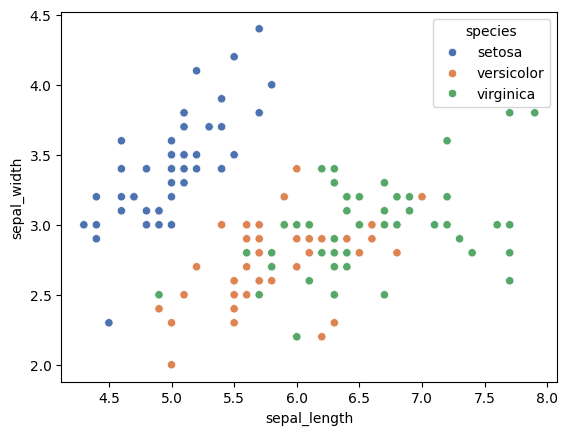

In [111]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='deep')

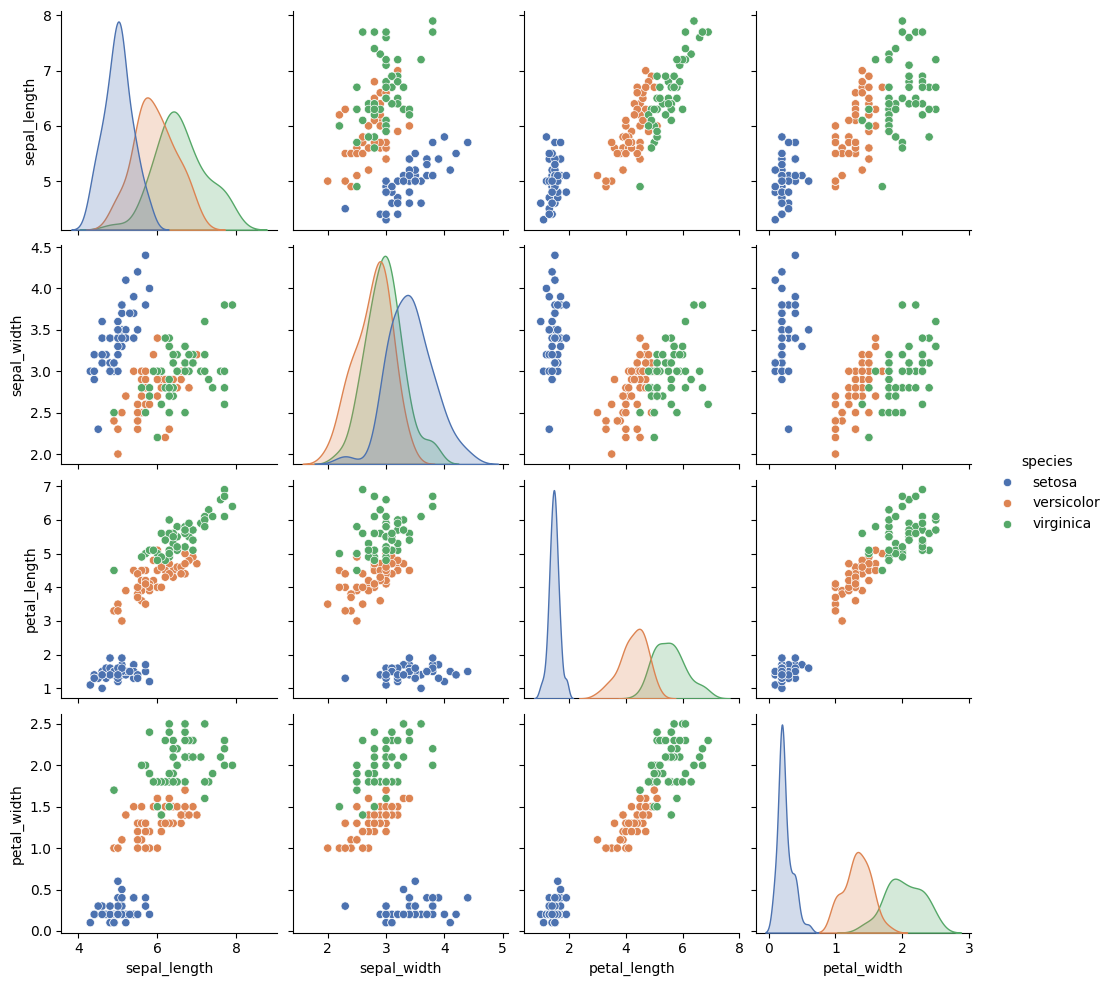

In [112]:
sns.pairplot(df, hue='species', palette='deep')

<Axes: xlabel='species', ylabel='petal_length'>

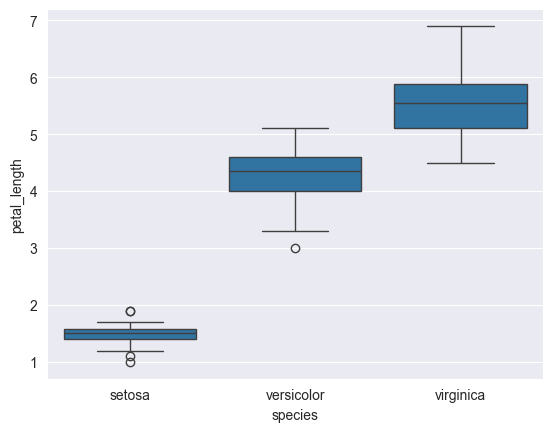

In [121]:
sns.boxplot(x='species', y='petal_length', data=df)

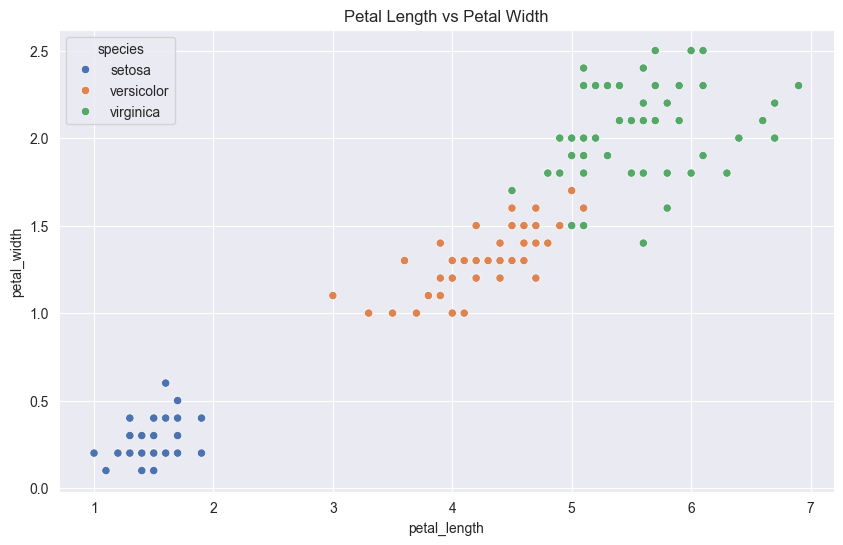

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='deep')
plt.title('Petal Length vs Petal Width')
plt.show()

In [113]:
# 4. Come up with a set of rules that could be used to predict species based upon measurements.

Setosa: Petal length < 2.0

Versicolor: Petal length between 2.0 and 5.0, and petal width < 1.8

Virginica: Petal length > 5.0

In [118]:
# BONUS: Define a function that accepts a row of data and returns a predicted species.

In [115]:
def predict_species(row):
    if row['sepal_length'] < 5.0:
        return 'setosa'
    elif row['sepal_length'] < 6.0:
        return 'versicolor'
    else:
        return 'virginica'

In [119]:
df['predicted_species'] = df.apply(predict_species, axis=1)

In [120]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
0,5.1,3.5,1.4,0.2,setosa,versicolor
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,versicolor
